# Import Libraries

In [13]:
import numpy as np
from sklearn.cluster import KMeans 
import csv
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from utils import Utility

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Load and Analyse Data

In [14]:
utils = Utility()
news_data = utils.load_data('Data/bbc-text.csv')
news_data = shuffle(news_data)
news_data.reset_index(inplace=True, drop=True)

In [ ]:
news_data.head()

,category,text
0,business,bush to get tough on deficit us president ge...
1,politics,blair rejects tory terror offer tony blair has...
2,business,fannie mae should restate books us mortgage ...
3,politics,what really divides the parties so what is the...
4,entertainment,children vote shrek 2 best film young uk film ...


In [ ]:
news_data.tail()

,category,text
2220,tech,no re-draft for eu patent law a proposed euro...
2221,entertainment,brit awards for devon music acts devon singer ...
2222,entertainment,police praise courageous ozzy rock star ozzy...
2223,business,high fuel prices hit ba s profits british airw...
2224,business,nortel in $300m profit revision telecoms equip...


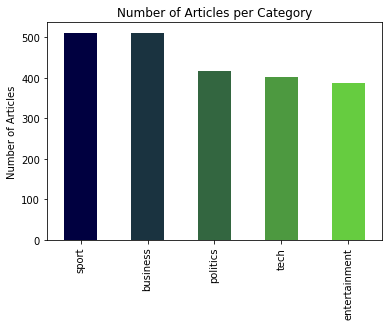

In [ ]:
colors = [(x/10.0, x/5.0, 0.25) for x in range(5)] 
news_data.category.value_counts().plot(kind='bar',color=colors)
plt.title('Number of Articles per Category')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
print('Total categories: ' + str(np.unique(news_data['category'])))
print('Total number of news articles: ' + str(len(news_data['text'])))
news_data.describe()

Total categories: ['business' 'entertainment' 'politics' 'sport' 'tech']
Total number of news articles: 2225


,category,text
count,2225,2225
unique,5,2126
top,sport,ocean s twelve raids box office ocean s twelve...
freq,511,2


# Data Preprocessing

In [15]:
news_data['text_lemmatized']= None
for i in range(2225):
    text = str(news_data['text'][i])
    text = utils.remove_bad_chars(text)
    text = utils.lemmatize_sentence(text)
    text = utils.remove_non_eng_words(text)
    news_data['text_lemmatized'][i] = str(text)

In [ ]:
news_data.head(4)

,category,text,text_lemmatized
0,business,bush to get tough on deficit us president ge...,bush to get tough on deficit us president w bu...
1,politics,blair rejects tory terror offer tony blair has...,blair reject tory terror offer tony blair have...
2,business,fannie mae should restate books us mortgage ...,mae should restate book us mortgage company ma...
3,politics,what really divides the parties so what is the...,what really divide the party so what be the ga...


# TFIDF-Vectorization

In [16]:
TFIDF_vec = utils.get_TFIDF(news_data.text_lemmatized)

In [ ]:
TFIDF_vec.head(10)

,aa,abacus,abandon,abandoned,abandonment,abate,abatement,abbas,abbasi,abbey,abbot,abdication,abdomen,abdominal,abduct,abduction,aberration,abet,abeyance,abhorrent,abide,abiding,abigail,ability,able,abnormal,abnormality,abolish,abolition,aborted,abortion,abortionist,abortive,abroad,abruptly,absence,absent,absentee,absolute,absolutely,...,yearlong,yearly,yearn,yell,yelling,yellow,yen,yeo,yes,yesterday,yesteryear,yield,ym,yoga,yore,york,yorker,young,younger,youngster,youth,youthful,yuan,zander,zar,zeal,zed,zenith,zephyr,zeppelin,zero,zeta,zimbabwe,zinc,zip,zodiac,zombie,zone,zoom,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Find number of clusters using Elbow-method

1 971.6480961706984
2 960.9912017671223
3 952.7370187277363
4 945.6246556251833
5 939.0029945032386
6 937.002373574826
7 935.0069965083547
8 934.0059945485749
9 933.0043647332375
10 932.0023548454856


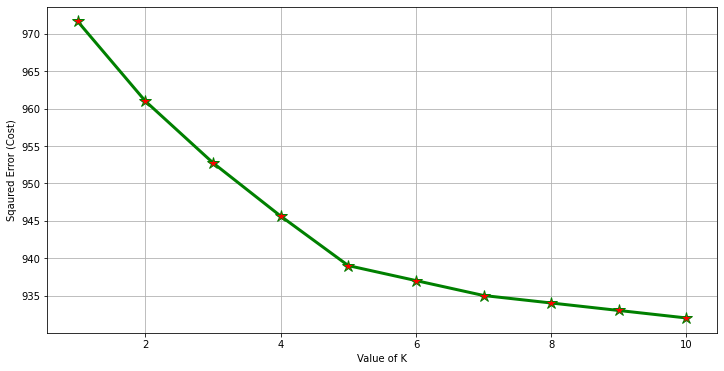

In [59]:
cost = []

for k in range(1,11):
    kmeanModel= KMeans(n_clusters=k,n_init=30,max_iter=200) 
    kmeanModel.fit(TFIDF_vec)
    cost.append(kmeanModel.inertia_) 
    print(k,cost[k-1])

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),cost, linewidth=3, color="Green", marker ="*", markerfacecolor="Red", markerfacecoloralt="Red", markersize=12) 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

# Clustering

In [19]:
K = 5
kmeanModel= KMeans(n_clusters=K,verbose=0,n_init=30,max_iter=300)
kmeanModel.fit(TFIDF_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y_pred = kmeanModel.predict(TFIDF_vec)  

In [ ]:
tsne = TSNE(n_components=2, perplexity=100,learning_rate=100.0,n_iter=700, metric='euclidean', verbose=1)
tsne_results = tsne.fit_transform(TFIDF_vec)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2225 samples in 4.093s...
[t-SNE] Computed neighbors for 2225 samples in 145.699s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.351489
[t-SNE] KL divergence after 50 iterations with early exaggeration: 65.047775
[t-SNE] KL divergence after 700 iterations: 1.115189


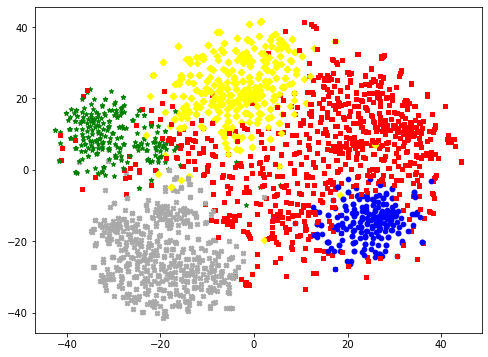

In [ ]:
clr = ['Blue','Green','Red','Darkgray','Yellow']
markers = ['o','*','s','X','D']
area = np.pi*7
plt.figure(figsize=(8,6))
for i in range(tsne_results.shape[0]):
    X = tsne_results[:,0][i]
    Y = tsne_results[:,1][i]
    plt.scatter(X, Y, s=area, color=clr[y_pred[i]], marker=markers[y_pred[i]])
plt.show()

# Result Analysis

In [23]:
news_data['cluster'] = y_pred

In [37]:
news_data['cluster'] = y_pred
news_data[['category','cluster']][30:40]

,category,cluster
30,business,1
31,sport,4
32,entertainment,1
33,tech,0
34,business,1
35,politics,3
36,business,1
37,entertainment,1
38,business,1
39,tech,0


In [39]:
news_data[['category','cluster']][105:110]

,category,cluster
105,sport,4
106,tech,0
107,sport,4
108,politics,1
109,sport,4


In [32]:
accuracy = 0
for i in range(K):
    temp_df = news_data[news_data['cluster'] == i]
    cat_mode = stats.mode(np.array(temp_df.category))
    print(cat_mode.mode[0],cat_mode.count[0],len(temp_df.category))
    accuracy = accuracy + (cat_mode.count[0]/len(temp_df.category))
print('Accuracy (Method 1) : '+str(round((accuracy/5)*100,2))+'%')     

accuracy2 = 0
category = ['entertainment','sport','tech','business','politics']
for i in category:
    temp_df = news_data[news_data['category'] == i]
    cat_mode = stats.mode(np.array(temp_df.cluster))
    #print(cat_mode.mode[0],cat_mode.count[0],len(temp_df.cluster))
    accuracy2 = accuracy2 + (cat_mode.count[0]/len(temp_df.cluster))  
print('Accuracy (Method 2) : '+str(round((accuracy2/5)*100,2))+'%')  
print('Final Accuracy : '+str(round(((accuracy+accuracy2)/10)*100,2))+'%')        

tech 334 351
business 501 960
entertainment 192 200
politics 224 226
sport 472 488
Accuracy (Method 1) : 87.84%
Accuracy (Method 2) : 87.27%
Final Accuracy : 87.55%
